In [150]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

import acquire


1) Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

    a) Choose features other than the ones used in the lesson.
    b) Visualize the results of your clustering.
    c) Use the elbow method to visually select a good value for k.
    d) Repeat the clustering, this time with 3 different features.

In [151]:
# acquire data
iris = acquire.get_iris_data()

In [152]:
iris.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [153]:
# establish df for clustering exploration
X = iris[['sepal_width', 'petal_width']]

In [154]:
# establish instance of k, fit and use to predict
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [155]:
# append predictions to our original dataframe
iris['cluster'] = kmeans.predict(X)

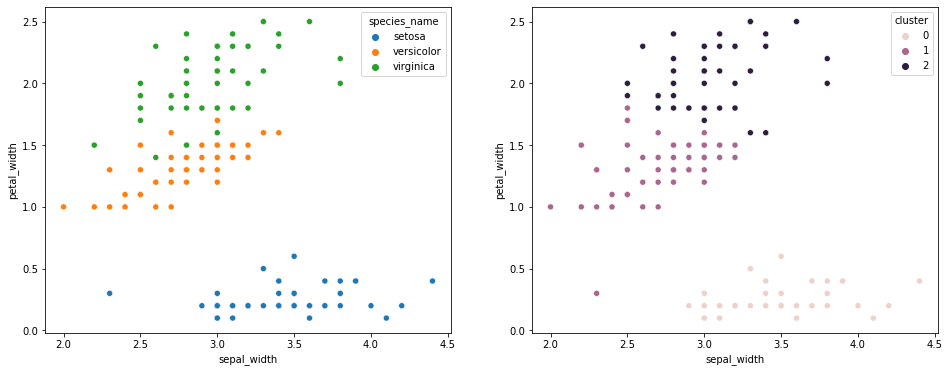

In [156]:
# Plot original vs kmeans cluster prediction
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.scatterplot(data=iris, x='sepal_width', y='petal_width', hue='species_name')
plt.subplot(122)
sns.scatterplot(data=iris, x='sepal_width', y='petal_width', hue='cluster')
plt.show()

In [157]:
# replace cluster numeric values w/species names
iris['cluster'] = iris['cluster'].replace({0:'virginica', 1:'setosa', 2:'versicolor'})

In [158]:
iris.cluster.value_counts()

setosa        53
virginica     49
versicolor    48
Name: cluster, dtype: int64

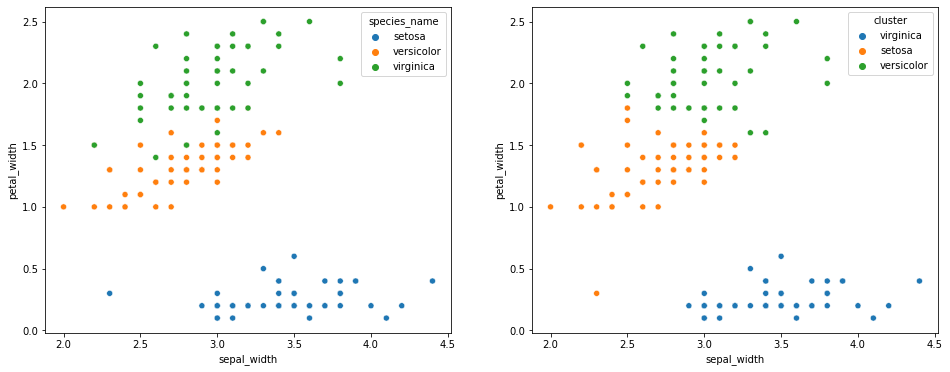

In [159]:
# Plot original vs kmeans cluster prediction
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.scatterplot(data=iris, x='sepal_width', y='petal_width', hue='species_name')
plt.subplot(122)
sns.scatterplot(data=iris, x='sepal_width', y='petal_width', hue='cluster')
plt.show()

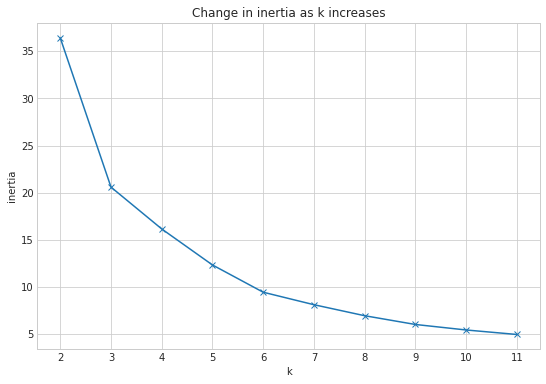

In [160]:
# Elbow grease
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    

In [161]:
# use 3 features instead of 2
# establish df for clustering exploration
Y = iris[['sepal_width', 'petal_width', 'petal_length']]

In [162]:
# establish instance of k, fit and use to predict
kmeans = KMeans(n_clusters=3)
kmeans.fit(Y)

kmeans.predict(Y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [163]:
# append predictions to our original dataframe
iris['cluster_y'] = kmeans.predict(Y)

In [164]:
iris.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width,cluster,cluster_y
0,1,setosa,5.1,3.5,1.4,0.2,virginica,1
1,1,setosa,4.9,3.0,1.4,0.2,virginica,1
2,1,setosa,4.7,3.2,1.3,0.2,virginica,1
3,1,setosa,4.6,3.1,1.5,0.2,virginica,1
4,1,setosa,5.0,3.6,1.4,0.2,virginica,1


In [165]:
iris.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width,cluster,cluster_y
0,1,setosa,5.1,3.5,1.4,0.2,virginica,1
1,1,setosa,4.9,3.0,1.4,0.2,virginica,1
2,1,setosa,4.7,3.2,1.3,0.2,virginica,1
3,1,setosa,4.6,3.1,1.5,0.2,virginica,1
4,1,setosa,5.0,3.6,1.4,0.2,virginica,1


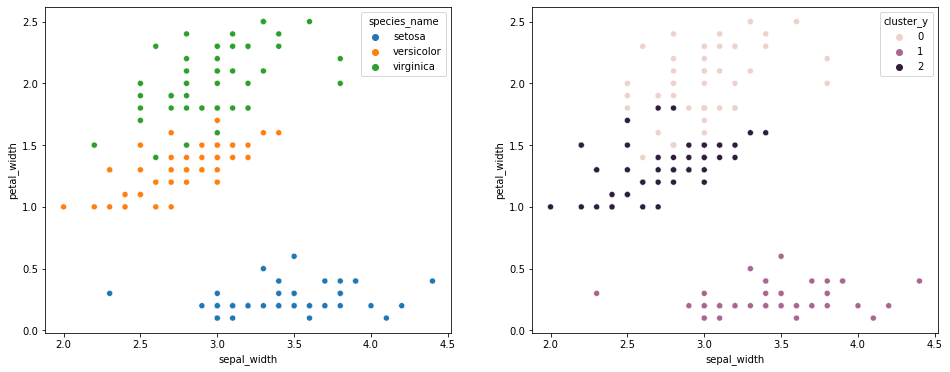

In [166]:
# Plot original vs predicted 
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.scatterplot(data=iris, x='sepal_width', y='petal_width', hue='species_name')
plt.subplot(122)
sns.scatterplot(data=iris, x='sepal_width', y='petal_width', hue='cluster_y')
plt.show()

In [167]:
# replace cluster numeric values w/species names
iris['cluster_y'] = iris['cluster_y'].replace({0:'virginica', 1:'setosa', 2:'versicolor'})

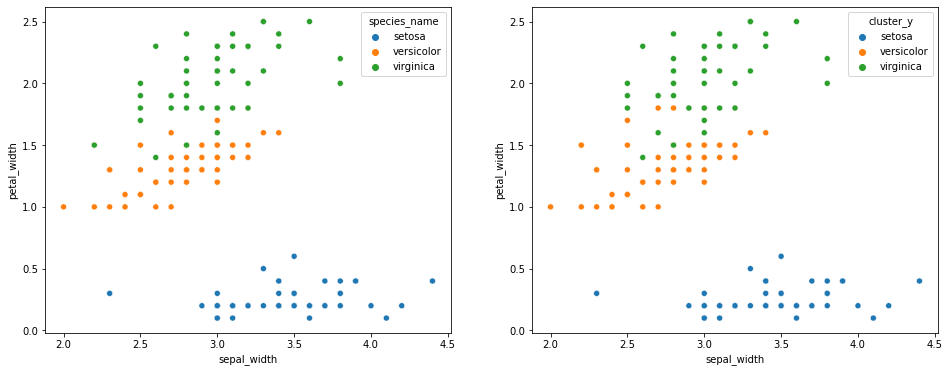

In [168]:
# Plot original vs kmeans cluster prediction
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.scatterplot(data=iris, x='sepal_width', y='petal_width', hue='species_name')
plt.subplot(122)
sns.scatterplot(data=iris, x='sepal_width', y='petal_width', hue='cluster_y')
plt.show()

2) Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

3) How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [175]:
#acquire google docs data
sheet_url = 'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/export?gid=0&format=csv'    

csv_export_url = sheet_url

df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


<AxesSubplot:xlabel='x', ylabel='y'>

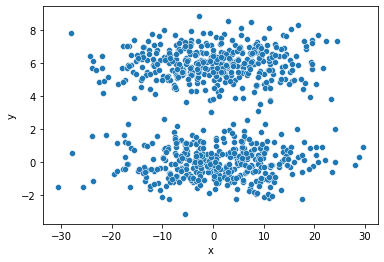

In [177]:
sns.scatterplot(data=df_googlesheet, x='x', y='y')

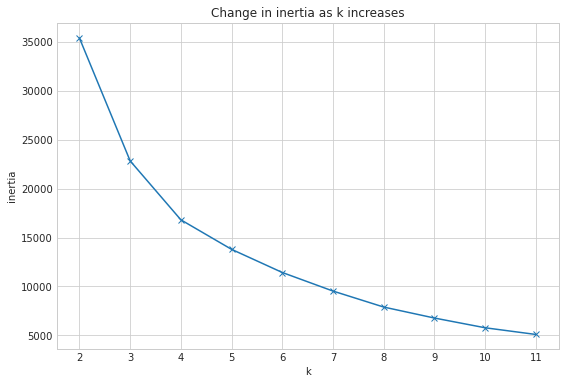

In [178]:
# Elbow grease
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(df_googlesheet).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    

Takeaway: my eyes are telling me 2 clusters but the "elbow method" is suggesting 3 or 4. 2 distinct y clusters around 0 & 6.  Perhaps I'll find 2 additional clusters around (-) & (+) values for x.

In [179]:
# establish df for clustering exploration
Z = df_googlesheet[['x', 'y']]

In [180]:
# establish instance of k, fit and use to predict using k = 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(Z)

kmeans.predict(Z)

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [181]:
# append predictions to our original dataframe
df_googlesheet['cluster_2'] = kmeans.predict(Z)

In [187]:
# establish instance of k, fit and use to predict using k = 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(Z)

kmeans.predict(Z)

array([1, 1, 1, 0, 3, 1, 0, 0, 1, 0, 1, 2, 3, 1, 1, 0, 0, 0, 0, 2, 1, 3,
       2, 0, 3, 0, 0, 0, 1, 2, 3, 3, 2, 3, 1, 1, 1, 0, 0, 1, 0, 2, 3, 0,
       0, 1, 3, 1, 1, 0, 1, 1, 0, 1, 0, 0, 3, 3, 1, 0, 1, 3, 0, 0, 1, 1,
       1, 1, 2, 0, 0, 1, 1, 1, 0, 3, 1, 1, 2, 0, 2, 1, 3, 0, 1, 2, 1, 0,
       1, 0, 2, 1, 0, 0, 0, 1, 3, 0, 1, 3, 3, 0, 1, 1, 1, 0, 1, 0, 0, 3,
       1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1,
       1, 3, 0, 0, 1, 0, 0, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 3, 1, 1,
       3, 1, 3, 0, 2, 0, 3, 1, 3, 0, 1, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 3, 0, 3, 3, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 3, 3, 1, 0, 3, 3, 0, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0,
       1, 1, 3, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 1, 0, 2, 1,
       3, 3, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 1, 1, 2, 2, 0, 0, 3, 3, 0,
       1, 3, 1, 0, 3, 0, 0, 0, 3, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 2, 3, 0, 0, 0, 2, 1, 1, 3,

In [188]:
# append predictions to our original dataframe
df_googlesheet['cluster_4'] = kmeans.predict(Z)

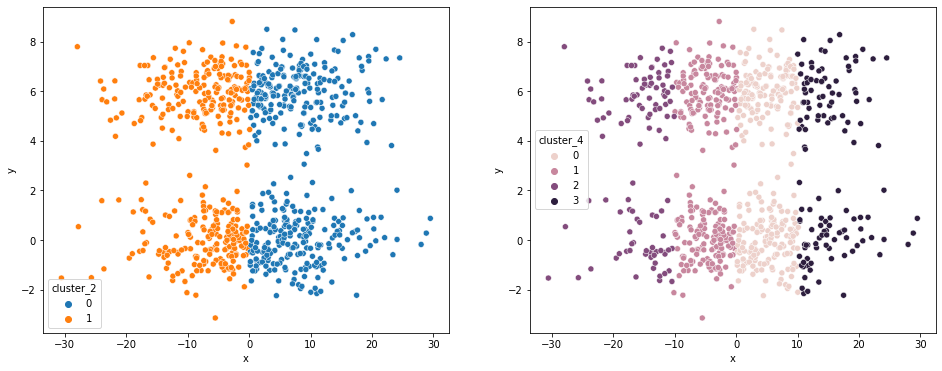

In [189]:
# Plot original vs predicted 
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.scatterplot(data=df_googlesheet, x='x', y='y', hue='cluster_2')
plt.subplot(122)
sns.scatterplot(data=df_googlesheet, x='x', y='y', hue='cluster_4')
plt.show()

In [191]:
#renew google docs data
sheet_url = 'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/export?gid=0&format=csv'    

csv_export_url = sheet_url

df_gs2 = pd.read_csv(csv_export_url)
df_gs2.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


<AxesSubplot:xlabel='x', ylabel='Count'>

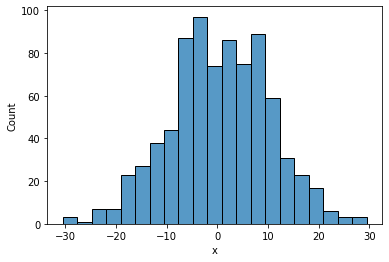

In [194]:
# histogram for x
sns.histplot(data=df_gs2, x='x')

<AxesSubplot:xlabel='y', ylabel='Count'>

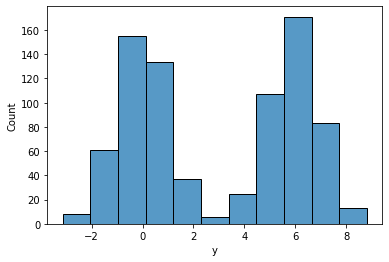

In [196]:
#histogram for y
sns.histplot(data=df_gs2, x='y')

In [199]:
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

In [201]:
x_train_and_validate, x_test = train_test_split(df_gs2, random_state=123)
x_train, x_validate = train_test_split(x_train_and_validate)

Text(0.5, 1.0, 'Scaled')

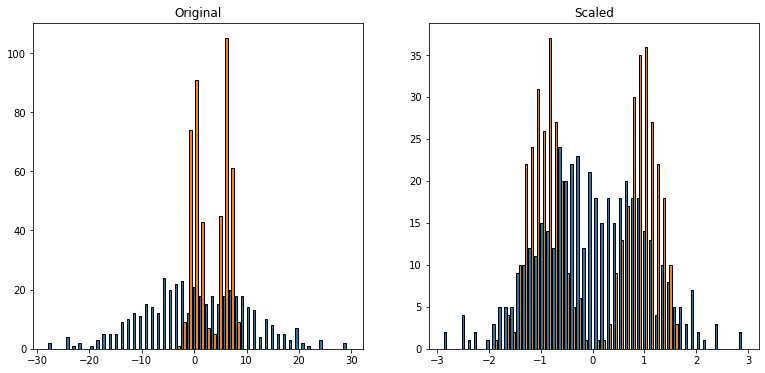

In [228]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(df_gs2)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=50, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=50, ec='black')
plt.title('Scaled')

In [229]:
# establish instance of k, fit and use to predict using k = 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_train_scaled)

kmeans.predict(x_train_scaled)

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,

In [234]:
x_train_scaled = pd.DataFrame(x_train_scaled)

In [235]:
x_train_scaled['pred'] = kmeans.predict(x_train_scaled)

In [237]:
# establish instance of k, fit and use to predict using k = 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(x_train_scaled)

kmeans.predict(x_train_scaled)

array([1, 1, 1, 1, 1, 2, 0, 3, 2, 3, 1, 2, 3, 2, 1, 3, 2, 1, 0, 2, 2, 1,
       2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 3, 0, 0, 2,
       0, 1, 2, 1, 1, 3, 3, 2, 0, 3, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 3, 1,
       2, 2, 2, 3, 1, 0, 0, 3, 1, 2, 3, 1, 3, 0, 3, 2, 1, 2, 1, 2, 0, 3,
       2, 3, 3, 1, 0, 2, 0, 0, 0, 0, 3, 0, 2, 1, 3, 2, 1, 3, 0, 2, 0, 0,
       3, 2, 0, 1, 0, 3, 2, 3, 2, 3, 0, 3, 1, 3, 1, 3, 2, 3, 3, 3, 3, 2,
       2, 3, 2, 0, 2, 1, 2, 3, 3, 3, 2, 1, 2, 0, 1, 3, 3, 3, 2, 0, 2, 0,
       0, 3, 0, 1, 1, 3, 2, 2, 1, 3, 0, 1, 0, 3, 0, 1, 1, 0, 1, 2, 1, 1,
       3, 3, 1, 1, 3, 3, 0, 0, 1, 0, 2, 1, 3, 2, 0, 1, 1, 1, 1, 0, 2, 3,
       0, 0, 1, 1, 3, 1, 0, 0, 2, 1, 3, 1, 3, 2, 1, 0, 1, 3, 3, 1, 2, 0,
       2, 1, 0, 2, 3, 3, 2, 2, 0, 2, 0, 0, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 0, 3, 2, 1, 1, 3, 1, 1, 0, 0, 2, 3, 1, 0, 0, 2, 1, 0, 0,
       3, 3, 0, 0, 1, 3, 2, 1, 3, 0, 2, 1, 3, 3, 0, 2, 3, 0, 2, 1, 2, 2,
       0, 3, 0, 1, 3, 2, 2, 3, 3, 1, 1, 3, 2, 2, 2,

In [238]:
x_train_scaled['pred4'] = kmeans.predict(x_train_scaled)

In [244]:
x_train_scaled = x_train_scaled.rename(columns={0:'x', 1:'y'})


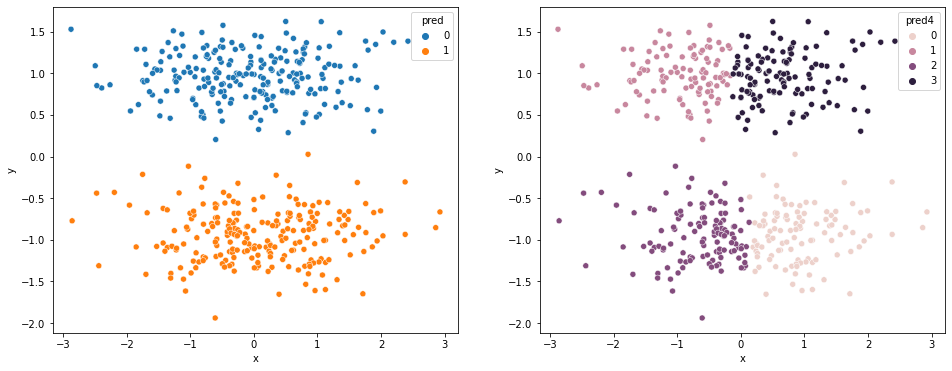

In [245]:
# Plot original vs predicted 
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.scatterplot(data=x_train_scaled, x='x', y='y', hue='pred')
plt.subplot(122)
sns.scatterplot(data=x_train_scaled, x='x', y='y', hue='pred4')
plt.show()